<a href="https://colab.research.google.com/github/rvdrupal/Neural-Networks-and-Deep-Learning/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2019-11-14 08:35:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.1s    

2019-11-14 08:35:55 (245 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
import itertools
from matplotlib.ticker import NullFormatter
import seaborn as sns


In [0]:
df=pd.read_csv('teleCust1000t.csv')
print(df.head(5))
df.tail(5)

   region  tenure  age  marital  ...  retire  gender  reside  custcat
0       2      13   44        1  ...     0.0       0       2        1
1       3      11   33        1  ...     0.0       0       6        4
2       3      68   52        1  ...     0.0       1       2        3
3       2      33   33        0  ...     0.0       1       1        1
4       2      23   30        1  ...     0.0       0       4        3

[5 rows x 12 columns]


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [0]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

convert pandas data frame into numpy arrat


In [0]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Convertin Y into numpy array data

In [0]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

Normalize Data¶

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[3:]

array([[-0.02696767, -0.11831864, -0.69181243, ..., -0.22207644,
         0.96655883, -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797, ..., -0.22207644,
        -1.03459817,  1.16300577],
       [-0.02696767,  0.2564039 , -0.21382135, ..., -0.22207644,
         0.96655883, -0.92747794],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def train_test_accuracy(neigh):
  yhat = neigh.predict(X_test)
  yhat[0:5]
  from sklearn import metrics
  X_train_acc=metrics.accuracy_score(y_train, neigh.predict(X_train))
  X_test_acc=metrics.accuracy_score(y_test, yhat)
  return X_train_acc,X_test_acc

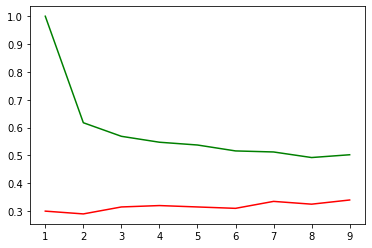

In [0]:
train_acc=[]
test_acc=[]
for i in range(1,10):
  #Train Model and Predict  
  neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
  X_train_acc,X_test_acc=train_test_accuracy(neigh)
  train_acc.append(X_train_acc)
  test_acc.append(X_test_acc)

plt.plot(range(1,10),train_acc,'g-')
plt.plot(range(1,10),test_acc,'r-')